In [1]:
import zarr
import allel
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [2]:
# Install the malariagen_data package, currently a prerelease
!pip install -q --pre --upgrade --no-cache-dir malariagen-data

In [4]:
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/", pre=True)

In [16]:
import yaml

In [62]:
#species name dict
sp_sp = {'arab':'arabiensis',
        'gamb_colu': 'gamb_colu'}

### per sample colours

In [11]:
# Load sample metadata
df_samples = ag3.sample_metadata('v3_wild')

In [19]:
#load yaml
with open('location_colours.yaml') as file:
    location_colours = yaml.load(file, Loader=yaml.Loader)

In [32]:
#new column - per sample colours
df_samples['colour'] = df_samples.apply(lambda row: location_colours[row.country][row.location], axis=1)

In [61]:
df_samples.species_gambcolu_arabiensis.value_counts()

gamb_colu       2415
arabiensis       368
intermediate       1
Name: species_gambcolu_arabiensis, dtype: int64

In [56]:
df_samples[df_samples.species_gambcolu_arabiensis == 'arabiensis']

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,colour
269,AB0333-C,BF18-11,Austin Burt,Burkina Faso,Bana,2014,7,11.233,-4.472,F,AG1000G-BF-B,v3,0.472,0.731,arabiensis,NaN,arabiensis,#9062c9
324,AB0457-C,BF17-34,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,M,AG1000G-BF-B,v3,0.452,0.712,arabiensis,NaN,arabiensis,#8f62c9
341,AB0502-C,BF17-15,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,M,AG1000G-BF-B,v3,0.441,0.693,arabiensis,NaN,arabiensis,#8f62c9
1012,AN0341-C,621,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,F,AG1000G-CM-C,v3,0.478,0.651,arabiensis,NaN,arabiensis,#5976bf
1013,AN0338-C,557,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,F,AG1000G-CM-C,v3,0.493,0.618,arabiensis,NaN,arabiensis,#5976bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,AC0085-C,3_E2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.454,0.733,arabiensis,NaN,arabiensis,#00859a
2572,AC0086-C,3_F1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.451,0.742,arabiensis,NaN,arabiensis,#00859a
2573,AC0087-Cx,3_F2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.454,0.741,arabiensis,NaN,arabiensis,#00859a
2574,AC0088-C,3_G1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,F,AG1000G-UG,v3,0.460,0.747,arabiensis,NaN,arabiensis,#00859a


In [34]:
df_samples.colour

0       #837371
1       #837371
2       #837371
3       #837371
4       #837371
         ...   
2779    #328293
2780    #328293
2781    #328293
2782    #328293
2783    #328293
Name: colour, Length: 2784, dtype: object

### per sample input alleles

In [36]:
ac = zarr.open('../data/allele_counts_for_pca_umap/arab.pca_umap_input_alleles.zarr.zip', mode='r')

In [38]:
ac['allele_counts_pca_ready'][:].shape

(40862, 368)

In [63]:
def umapper(pops):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    print(ac['allele_counts_pca_ready'][:].shape)
    
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
            
    reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=.99, metric='euclidean')
    embedding = reducer.fit_transform(ac['allele_counts_pca_ready'][:].T)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(embedding[:, 0], embedding[:, 1], c=df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]].colour, edgecolor='w', s=50)

(40862, 368)


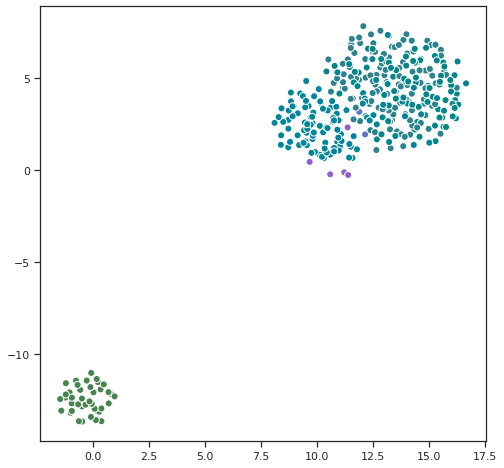

In [64]:
umapper('arab')

(81239, 2415)


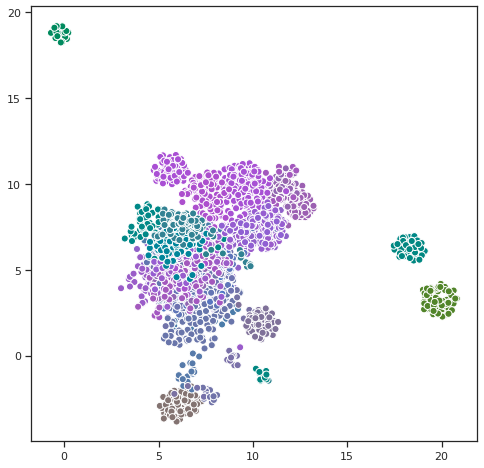

In [65]:
umapper('gamb_colu')

In [66]:
#umapper('gamb_colu_arab')

## Downsample populations

Downsample larger populations to give a more balanced view.

In [67]:
df_samples.sample_set.value_counts()

AG1000G-CM-A    303
AG1000G-TZ      300
AG1000G-UG      290
AG1000G-GN-B    185
AG1000G-BF-A    181
AG1000G-GM-C    174
AG1000G-BF-B    102
AG1000G-GW      101
AG1000G-GH      100
AG1000G-CM-B     97
AG1000G-KE       86
AG1000G-AO       81
AG1000G-CI       80
AG1000G-CD       76
AG1000G-GM-A     74
AG1000G-MZ       74
AG1000G-CF       73
AG1000G-ML-B     71
AG1000G-GA-A     69
AG1000G-ML-A     60
AG1000G-GN-A     45
AG1000G-CM-C     44
AG1000G-MW       41
AG1000G-GM-B     31
AG1000G-FR       23
AG1000G-BF-C     13
AG1000G-GQ       10
Name: sample_set, dtype: int64

In [73]:
pop_nm = df_samples.sample_set.unique()
pop_nm

array(['AG1000G-AO', 'AG1000G-BF-A', 'AG1000G-BF-B', 'AG1000G-BF-C',
       'AG1000G-CD', 'AG1000G-CF', 'AG1000G-CI', 'AG1000G-CM-A',
       'AG1000G-CM-B', 'AG1000G-CM-C', 'AG1000G-FR', 'AG1000G-GA-A',
       'AG1000G-GH', 'AG1000G-GM-A', 'AG1000G-GM-B', 'AG1000G-GM-C',
       'AG1000G-GN-A', 'AG1000G-GN-B', 'AG1000G-GQ', 'AG1000G-GW',
       'AG1000G-KE', 'AG1000G-ML-A', 'AG1000G-ML-B', 'AG1000G-MW',
       'AG1000G-MZ', 'AG1000G-TZ', 'AG1000G-UG'], dtype=object)

In [74]:
def downsample(n=50):
    idxs = []
    for pop in pop_ids:
        pop_idxs = df_samples[df_samples.population == pop].index.values
        if len(pop_idxs) > n:
            pop_idxs = np.random.choice(pop_idxs, size=n, replace=False)
        idxs.extend(pop_idxs)
    # randomly shuffle for better plotting
    np.random.shuffle(idxs)
    return idxs